**<b><font color="red">ch12. 데이터프레임과 시리즈(Pandas)</font><b>**

# 8절. 데이터그룹화 및 집계

In [54]:
import pandas as pd
import numpy as np
# import statsmodels.api as sm
from statsmodels.api import datasets
iris_df = datasets.get_rdataset("iris", package="datasets").data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 8.1 Group by

In [17]:
iris_df.groupby(iris_df.Species).mean()
# . mean() 자리에 여러 함수들 들어 갈 수 있음.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [18]:
iris_df.groupby(iris_df.Species)['Sepal.Length','Sepal.Width'].mean()
# groupby 할때 왠만해서는 이렇게 하지말라는 경고.

<ipython-input-18-6dbe291aa2e7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  iris_df.groupby(iris_df.Species)['Sepal.Length','Sepal.Width'].mean()


,Sepal.Length,Sepal.Width
Species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [19]:
# 기본적으로 mean(). => aggfunc = mean 이라서 그렇다.
iris_df.pivot_table(index = "Species", values = ["Sepal.Length","Sepal.Width"])

,Sepal.Length,Sepal.Width
Species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [20]:
# sum() 하고 싶으면.
iris_df.pivot_table(index = "Species", values = ["Sepal.Length","Sepal.Width"],
                    aggfunc='sum')

,Sepal.Length,Sepal.Width
Species,,
setosa,250.3,171.4
versicolor,296.8,138.5
virginica,329.4,148.7


In [21]:
iris_df.pivot_table(index = "Species", values = ["Sepal.Length"],
                    aggfunc='sum')

,Sepal.Length
Species,
setosa,250.3
versicolor,296.8
virginica,329.4


In [22]:
iris_df.groupby(iris_df.Species)['Sepal.Length'].sum()

Species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: Sepal.Length, dtype: float64

In [23]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped

In [24]:
iris_grouped.mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [25]:
iris_grouped.count() # 결측치를 뺀 갯수

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [26]:
iris_df.loc[1, 'Sepal.Length'] = np.nan

In [27]:
import random
rownum = random.sample(range(len(iris_df)), 4)
rownum

[95, 77, 48, 38]

In [28]:
for row in rownum:
    iris_df.loc[row,'Sepal.Length'] = np.nan

In [29]:
iris_df.loc[rownum,'Sepal.Length']

95   NaN
77   NaN
48   NaN
38   NaN
Name: Sepal.Length, dtype: float64

In [30]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped.count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,47,50,50,50
versicolor,48,50,50,50
virginica,50,50,50,50


**다중 열로 그룹화**

In [31]:
iris_df.groupby([iris_df["Species"], iris_df["Sepal.Length"]]).mean()

Sepal.Width  Petal.Length  Petal.Width
Species    Sepal.Length                                        
setosa     4.3              3.000000      1.100000     0.100000
           4.4              3.050000      1.350000     0.200000
           4.5              2.300000      1.300000     0.300000
           4.6              3.325000      1.325000     0.225000
           4.7              3.200000      1.450000     0.200000
           4.8              3.180000      1.580000     0.200000
           4.9              3.266667      1.466667     0.133333
           5.0              3.362500      1.450000     0.287500
           5.1              3.600000      1.562500     0.312500
           5.2              3.666667      1.466667     0.166667
           5.4              3.660000      1.540000     0.320000
           5.5              3.850000      1.350000     0.200000
           5.7              4.100000      1.600000     0.350000
           5.8              4.000000      1.200000     0.200000
versicolor 4.9              2.400000      3.300000     1.000000
           5.0              2.150000      3.400000     1.000000
           5.1              2.500000      3.000000     1.100000
           5.2              2.700000      3.900000     1.400000
           5.4              3.000000      4.500000     1.500000
           5.5              2.440000      3.980000     1.180000
           5.6              2.820000      4.060000     1.300000
           5.7              2.775000      4.075000     1.225000
           5.8              2.666667      4.000000     1.133333
           5.9              3.100000      4.500000     1.650000
           6.0              2.800000      4.525000     1.425000
           6.1              2.875000      4.500000     1.325000
           6.2              2.550000      4.400000     1.400000
           6.3              2.700000      4.666667     1.466667
           6.4              3.050000      4.400000     1.400000
           6.5              2.800000      4.600000     1.500000
           6.6              2.950000      4.500000     1.350000
           6.7              3.100000      4.550000     1.450000
           6.8              2.800000      4.800000     1.400000
           6.9              3.100000      4.900000     1.500000
           7.0              3.200000      4.700000     1.400000
virginica  4.9              2.500000      4.500000     1.700000
           5.6              2.800000      4.900000     2.000000
           5.7              2.500000      5.000000     2.000000
           5.8              2.733333      5.100000     2.066667
           5.9              3.000000      5.100000     1.800000
           6.0              2.600000      4.900000     1.650000
           6.1              2.800000      5.250000     1.600000
           6.2              3.100000      5.100000     2.050000
           6.3              2.933333      5.366667     1.983333
           6.4              2.920000      5.460000     2.060000
           6.5              3.050000      5.400000     2.000000
           6.7              3.040000      5.600000     2.220000
           6.8              3.100000      5.700000     2.200000
           6.9              3.133333      5.400000     2.233333
           7.1              3.000000      5.900000     2.100000
           7.2              3.266667      5.966667     1.966667
           7.3              2.900000      6.300000     1.800000
           7.4              2.800000      6.100000     1.900000
           7.6              3.000000      6.600000     2.100000
           7.7              3.050000      6.600000     2.200000
           7.9              3.800000      6.400000     2.000000

In [32]:
iris_df.groupby([iris_df["Species"], iris_df["Sepal.Length"]]).describe()

Sepal.Width                                        \
                              count      mean       std  min    25%   50%   
Species    Sepal.Length                                                     
setosa     4.3                  1.0  3.000000       NaN  3.0  3.000  3.00   
           4.4                  2.0  3.050000  0.212132  2.9  2.975  3.05   
           4.5                  1.0  2.300000       NaN  2.3  2.300  2.30   
           4.6                  4.0  3.325000  0.221736  3.1  3.175  3.30   
           4.7                  2.0  3.200000  0.000000  3.2  3.200  3.20   
           4.8                  5.0  3.180000  0.204939  3.0  3.000  3.10   
           4.9                  3.0  3.266667  0.288675  3.1  3.100  3.10   
           5.0                  8.0  3.362500  0.192261  3.0  3.275  3.40   
           5.1                  8.0  3.600000  0.200000  3.3  3.475  3.60   
           5.2                  3.0  3.666667  0.378594  3.4  3.450  3.50   
           5.4                  5.0  3.660000  0.250998  3.4  3.400  3.70   
           5.5                  2.0  3.850000  0.494975  3.5  3.675  3.85   
           5.7                  2.0  4.100000  0.424264  3.8  3.950  4.10   
           5.8                  1.0  4.000000       NaN  4.0  4.000  4.00   
versicolor 4.9                  1.0  2.400000       NaN  2.4  2.400  2.40   
           5.0                  2.0  2.150000  0.212132  2.0  2.075  2.15   
           5.1                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.2                  1.0  2.700000       NaN  2.7  2.700  2.70   
           5.4                  1.0  3.000000       NaN  3.0  3.000  3.00   
           5.5                  5.0  2.440000  0.114018  2.3  2.400  2.40   
           5.6                  5.0  2.820000  0.216795  2.5  2.700  2.90   
           5.7                  4.0  2.775000  0.125831  2.6  2.750  2.80   
           5.8                  3.0  2.666667  0.057735  2.6  2.650  2.70   
           5.9                  2.0  3.100000  0.141421  3.0  3.050  3.10   
           6.0                  4.0  2.800000  0.496655  2.2  2.575  2.80   
           6.1                  4.0  2.875000  0.095743  2.8  2.800  2.85   
           6.2                  2.0  2.550000  0.494975  2.2  2.375  2.55   
           6.3                  3.0  2.700000  0.529150  2.3  2.400  2.50   
           6.4                  2.0  3.050000  0.212132  2.9  2.975  3.05   
           6.5                  1.0  2.800000       NaN  2.8  2.800  2.80   
           6.6                  2.0  2.950000  0.070711  2.9  2.925  2.95   
           6.7                  2.0  3.100000  0.000000  3.1  3.100  3.10   
           6.8                  1.0  2.800000       NaN  2.8  2.800  2.80   
           6.9                  1.0  3.100000       NaN  3.1  3.100  3.10   
           7.0                  1.0  3.200000       NaN  3.2  3.200  3.20   
virginica  4.9                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.6                  1.0  2.800000       NaN  2.8  2.800  2.80   
           5.7                  1.0  2.500000       NaN  2.5  2.500  2.50   
           5.8                  3.0  2.733333  0.057735  2.7  2.700  2.70   
           5.9                  1.0  3.000000       NaN  3.0  3.000  3.00   
           6.0                  2.0  2.600000  0.565685  2.2  2.400  2.60   
           6.1                  2.0  2.800000  0.282843  2.6  2.700  2.80   
           6.2                  2.0  3.100000  0.424264  2.8  2.950  3.10   
           6.3                  6.0  2.933333  0.350238  2.5  2.725  2.85   
           6.4                  5.0  2.920000  0.216795  2.7  2.800  2.80   
           6.5                  4.0  3.050000  0.100000  3.0  3.000  3.00   
           6.7                  5.0  3.040000  0.328634  2.5  3.000  3.10   
           6.8                  2.0  3.100000  0.141421  3.0  3.050  3.10   
           6.9                  3.0  3.133333  0.057735  3.1  3.100  3.10   
           7.1      

In [55]:
g = iris_df.groupby(iris_df.Species).mean()
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


<AxesSubplot:xlabel='Species'>

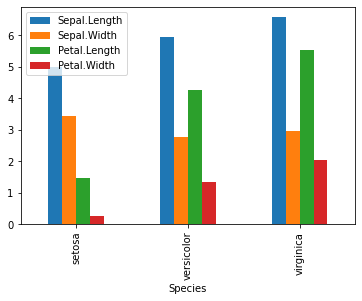

In [56]:
g.plot(kind='bar')

<AxesSubplot:xlabel='Species'>

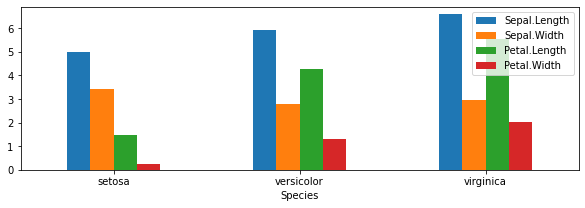

In [57]:
g.plot(kind='bar', rot=0, figsize=(10,3))

- 차트에 있는 범례(legend) 옮기는 도움 사이트 
- https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

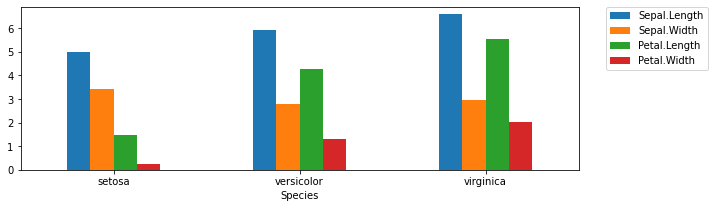

In [58]:
# 범례를 차트밖에 빼기.
import matplotlib.pyplot as plt
g.plot(kind='bar', rot=0, figsize=(10,3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [59]:
# .transpose() or .T 옆으로 길게 나와서 생략된것을 전치행렬을 붙여서 세로 출력.
g = iris_df.groupby(iris_df.Species).describe().transpose() 
g

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [68]:
g = iris_df.groupby([iris_df['Species'],iris_df['Petal.Width']]).mean()
g 

Sepal.Length  Sepal.Width  Petal.Length
Species    Petal.Width                                         
setosa     0.1              4.820000     3.360000      1.380000
           0.2              4.972414     3.379310      1.444828
           0.3              4.971429     3.328571      1.428571
           0.4              5.300000     3.785714      1.571429
           0.5              5.100000     3.300000      1.700000
           0.6              5.000000     3.500000      1.600000
versicolor 1.0              5.414286     2.371429      3.628571
           1.1              5.400000     2.466667      3.566667
           1.2              5.780000     2.740000      4.240000
           1.3              5.884615     2.746154      4.176923
           1.4              6.357143     2.957143      4.500000
           1.5              6.190000     2.880000      4.580000
           1.6              6.100000     3.133333      4.766667
           1.7              6.700000     3.000000      5.000000
           1.8              5.900000     3.200000      4.800000
virginica  1.4              6.100000     2.600000      5.600000
           1.5              6.150000     2.500000      5.050000
           1.6              7.200000     3.000000      5.800000
           1.7              4.900000     2.500000      4.500000
           1.8              6.445455     2.918182      5.381818
           1.9              6.340000     2.680000      5.320000
           2.0              6.650000     3.016667      5.550000
           2.1              6.916667     3.033333      5.783333
           2.2              6.866667     3.200000      6.033333
           2.3              6.912500     3.087500      5.700000
           2.4              6.266667     3.100000      5.433333
           2.5              6.733333     3.400000      5.933333

In [70]:
g = iris_df.groupby([iris_df['Species'],iris_df['Petal.Width']])['Sepal.Length'].mean()
g # 시리즈 타입으로 나온다.

Species     Petal.Width
setosa      0.1            4.820000
            0.2            4.972414
            0.3            4.971429
            0.4            5.300000
            0.5            5.100000
            0.6            5.000000
versicolor  1.0            5.414286
            1.1            5.400000
            1.2            5.780000
            1.3            5.884615
            1.4            6.357143
            1.5            6.190000
            1.6            6.100000
            1.7            6.700000
            1.8            5.900000
virginica   1.4            6.100000
            1.5            6.150000
            1.6            7.200000
            1.7            4.900000
            1.8            6.445455
            1.9            6.340000
            2.0            6.650000
            2.1            6.916667
            2.2            6.866667
            2.3            6.912500
            2.4            6.266667
            2.5            6.733333
Name

In [62]:
g.unstack() # 끝에있는 인덱스 Petal.Width사 컬럼값.

Sepal.Length                                                    \
Petal.Width          0.1       0.2       0.3  0.4  0.5  0.6       1.0  1.1   
Species                                                                      
setosa              4.82  4.972414  4.971429  5.3  5.1  5.0       NaN  NaN   
versicolor           NaN       NaN       NaN  NaN  NaN  NaN  5.414286  5.4   
virginica            NaN       NaN       NaN  NaN  NaN  NaN       NaN  NaN   

                             ... Petal.Length                             \
Petal.Width   1.2       1.3  ...          1.6  1.7       1.8   1.9   2.0   
Species                      ...                                           
setosa        NaN       NaN  ...          NaN  NaN       NaN   NaN   NaN   
versicolor   5.78  5.884615  ...     4.766667  5.0  4.800000   NaN   NaN   
virginica     NaN       NaN  ...     5.800000  4.5  5.381818  5.32  5.55   

                                                          
Petal.Width       2.1       2.2  2.3       2.4       2.5  
Species                                                   
setosa            NaN       NaN  NaN       NaN       NaN  
versicolor        NaN       NaN  NaN       NaN       NaN  
virginica    5.783333  6.033333  5.7  5.433333  5.933333  

[3 rows x 66 columns]

In [65]:
g.unstack().T

Species                     setosa  versicolor  virginica
             Petal.Width                                 
Sepal.Length 0.1          4.820000         NaN        NaN
             0.2          4.972414         NaN        NaN
             0.3          4.971429         NaN        NaN
             0.4          5.300000         NaN        NaN
             0.5          5.100000         NaN        NaN
...                            ...         ...        ...
Petal.Length 2.1               NaN         NaN   5.783333
             2.2               NaN         NaN   6.033333
             2.3               NaN         NaN   5.700000
             2.4               NaN         NaN   5.433333
             2.5               NaN         NaN   5.933333

[66 rows x 3 columns]

<AxesSubplot:>

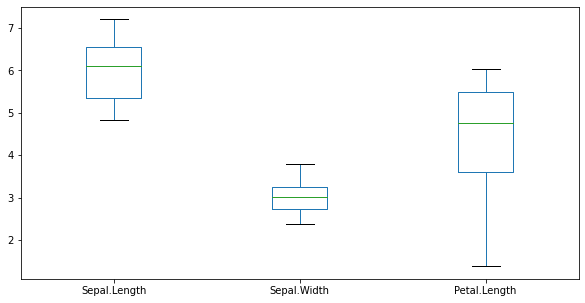

In [66]:
g.plot.box(figsize=(10,5))

In [71]:
g = iris_df.groupby([iris_df['Species'],iris_df['Petal.Width']])['Sepal.Length'].mean()
g.unstack()

Petal.Width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,...,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
Species,,,,,,,,,,,,,,,,,,,,,
setosa,4.82,4.972414,4.971429,5.3,5.1,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,5.414286,5.4,5.78,5.884615,...,6.1,6.7,5.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.2,4.9,6.445455,6.34,6.65,6.916667,6.866667,6.9125,6.266667,6.733333


In [73]:
import pandas as pd
pd.options.display.max_columns

20

In [75]:
pd.options.display.max_columns = 22

In [76]:
g.unstack()

Petal.Width,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
Species,,,,,,,,,,,,,,,,,,,,,,
setosa,4.82,4.972414,4.971429,5.3,5.1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,5.414286,5.4,5.78,5.884615,6.357143,6.19,6.1,6.7,5.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.100000,6.15,7.2,4.9,6.445455,6.34,6.65,6.916667,6.866667,6.9125,6.266667,6.733333


In [77]:
g.unstack().T

Species,setosa,versicolor,virginica
Petal.Width,,,
0.1,4.820000,NaN,NaN
0.2,4.972414,NaN,NaN
0.3,4.971429,NaN,NaN
0.4,5.300000,NaN,NaN
0.5,5.100000,NaN,NaN
0.6,5.000000,NaN,NaN
1.0,NaN,5.414286,NaN
1.1,NaN,5.400000,NaN
1.2,NaN,5.780000,NaN


## 8.2 그룹간 데이터

In [79]:
iris_group = iris_df.groupby(iris_df.Species)
iris_group

In [83]:
for idx, grouped in enumerate(iris_group):
    print(idx,'번째 그룹은 ? ')
    print(grouped) #튜플.
    print('=======================================')
    #0번째는 필드명들.
    #1번째는 데이터.  둘다 튜플값들이다.

0 번째 그룹은 ? 
('setosa',     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14

In [153]:
for idx, (species_name, group) in enumerate(iris_group):
    print(idx,'번째 그룹은 ? ', species_name)
    print(type(group))
    print('=======================================')

0 번째 그룹은 ?  setosa
<class 'pandas.core.frame.DataFrame'>
1 번째 그룹은 ?  versicolor
<class 'pandas.core.frame.DataFrame'>
2 번째 그룹은 ?  virginica
<class 'pandas.core.frame.DataFrame'>


In [154]:
for idx, (species_name, group) in enumerate(iris_group):
    print(idx,'번째 그룹은 ? ', species_name)
    print(group)
    print('=======================================')

0 번째 그룹은 ?  setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14    

In [96]:
for idx, (species_name, group) in enumerate(iris_group):
    print(idx,'번째 그룹은 ? ', species_name)
    print(group.sample(5)) #실행할때마다 데이터값이 다른데 seed값을 고정해서 하면 고정값으로 된다.
    print('=======================================')

0 번째 그룹은 ?  setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
22           4.6          3.6           1.0          0.2  setosa
34           4.9          3.1           1.5          0.2  setosa
16           5.4          3.9           1.3          0.4  setosa
11           4.8          3.4           1.6          0.2  setosa
24           4.8          3.4           1.9          0.2  setosa
1 번째 그룹은 ?  versicolor
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
82           5.8          2.7           3.9          1.2  versicolor
81           5.5          2.4           3.7          1.0  versicolor
53           5.5          2.3           4.0          1.3  versicolor
77           6.7          3.0           5.0          1.7  versicolor
91           6.1          3.0           4.6          1.4  versicolor
2 번째 그룹은 ?  virginica
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
137           6.4          3.1           5.5          1.8  virg

In [156]:
for idx, (species_name, group) in enumerate(iris_group):
    print(idx,'번째 그룹은 ? ', species_name)
    print(group.sample(5).sort_index()) 
    print('=======================================')

0 번째 그룹은 ?  setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
4            5.0          3.6           1.4          0.2  setosa
20           5.4          3.4           1.7          0.2  setosa
23           5.1          3.3           1.7          0.5  setosa
35           5.0          3.2           1.2          0.2  setosa
42           4.4          3.2           1.3          0.2  setosa
1 번째 그룹은 ?  versicolor
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
58           6.6          2.9           4.6          1.3  versicolor
61           5.9          3.0           4.2          1.5  versicolor
63           6.1          2.9           4.7          1.4  versicolor
78           6.0          2.9           4.5          1.5  versicolor
84           5.4          3.0           4.5          1.5  versicolor
2 번째 그룹은 ?  virginica
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
103           6.3          2.9           5.6          1.8  virg

## 8.3 데이터프레임 그룹 인덱싱

In [98]:
for idx, (species_name, group) in enumerate(iris_group):
    print(idx,'번째 그룹은 ? ', species_name)
    print(group.iloc[[1,11],:]) 
    print('=======================================')

0 번째 그룹은 ?  setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1            4.9          3.0           1.4          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
1 번째 그룹은 ?  versicolor
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
51           6.4          3.2           4.5          1.5  versicolor
61           5.9          3.0           4.2          1.5  versicolor
2 번째 그룹은 ?  virginica
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
101           5.8          2.7           5.1          1.9  virginica
111           6.4          2.7           5.3          1.9  virginica


In [101]:
#for idx, (species_name, group) in enumerate(iris_group):
#    print(idx,'번째 그룹은 ? ', species_name)
#    print(group.iloc[[1,11],:])
#    print('=======================================')
t = iris_df.groupby(iris_df.Species).take([1,11,21,31,41])
t # 각 종별 1,11,21,31,41 가져오기

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                             
setosa     1             4.9          3.0           1.4          0.2
           11            4.8          3.4           1.6          0.2
           21            5.1          3.7           1.5          0.4
           31            5.4          3.4           1.5          0.4
           41            4.5          2.3           1.3          0.3
versicolor 51            6.4          3.2           4.5          1.5
           61            5.9          3.0           4.2          1.5
           71            6.1          2.8           4.0          1.3
           81            5.5          2.4           3.7          1.0
           91            6.1          3.0           4.6          1.4
virginica  101           5.8          2.7           5.1          1.9
           111           6.4          2.7           5.3          1.9
           121           5.6          2.8           4.9          2.0
           131           7.9          3.8           6.4          2.0
           141           6.9          3.1           5.1          2.3

In [102]:
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,4.9,3.0,1.4,0.2
11,4.8,3.4,1.6,0.2
21,5.1,3.7,1.5,0.4
31,5.4,3.4,1.5,0.4
41,4.5,2.3,1.3,0.3


In [104]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 8.4 레이블(원핫인코딩)

In [105]:
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [106]:
iris_df.Species.describe()

count        150
unique         3
top       setosa
freq          50
Name: Species, dtype: object

In [108]:
# 레이블을 지원하는 패키지 이용.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #클래스를 이용해서 객체생성.
le.fit_transform(iris_df['Species']) # Species 의 가지수를 맨처음을 0, 그다음 1, ~~ 해주는

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [157]:
# 레이블을 지원하는 패키지 이용.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #클래스를 이용해서 객체생성.
iris_df['species'] = le.fit_transform(iris_df['Species'])
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


# 9절. 데이터 구조 변경

## 9.1 와이드 format(열이 많은 타입) vs 롱 format(행이 많은 타입)

판다스 공식 문서에 나오는 mlet : <br>
https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt <be>
    
[Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf) 7pagec<br>

In [111]:
import statsmodels.api as sm
# package 생략시 datasets 기본값
airquality_data = sm.datasets.get_rdataset("airquality")
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## 9.2 melt 를 이용한 언피벗팅

In [115]:
# id_vars  = 컬럼으로 남겨질 것들
# airquality.melt() 의 결과만 반환. 즉, 데이터셋에 반영x
airquality_melted = airquality.melt(id_vars=["Month","Day"])
airquality_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [114]:
airquality.sample()

,Ozone,Solar.R,Wind,Temp,Month,Day
132,24.0,259.0,9.7,73,9,10


In [117]:
# variable value 의 컬럼명 변경.
airquality.melt(id_vars = ["Month","Day"], 
                 var_name = "변수", value_name = "값") # value_name = value 가 기본값.

,Month,Day,변수,값
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [118]:
# 값을 기준으로 sort.
airquality_melted.sort_values(by=['Month','Day']).head()

,Month,Day,variable,value
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0


In [120]:
airquality.head(1)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1


In [122]:
airquality_melted_sort = airquality_melted.sort_values(by=['Month','Day'])
airquality_melted_sort.head() # 롱포맷 .

,Month,Day,variable,value
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0


In [123]:
import pandas as pd
# pd.melt(airquality, id_vars=["Month","Day"]) 가능.
airquality.melt(id_vars=["Month","Day"])

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


## 9.3 pivot_table을 이용한 피벗팅(롱형 데이터 -> 와이드형 데이터)

In [126]:
airquality_melted_sort.head(4)

,Month,Day,variable,value
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0


In [128]:
# airquality_melted , airquality_melted_sort => melt된 데이터 프레임.
airquality2 = airquality_melted.pivot_table(index = ["Month","Day"],
                              columns = ["variable"],
                              values = ["value"])
# 실행된 결과값만 반환하기에 데이터셋에 적용x
airquality2.head(2)

value                   
variable  Ozone Solar.R  Temp Wind
Month Day                         
5     1    41.0   190.0  67.0  7.4
      2    36.0   118.0  72.0  8.0

In [129]:
airquality2.loc[5].head() #5월 데이터만 가져오기.

value                    
variable Ozone Solar.R  Temp  Wind
Day                               
1         41.0   190.0  67.0   7.4
2         36.0   118.0  72.0   8.0
3         12.0   149.0  74.0  12.6
4         18.0   313.0  62.0  11.5
5          NaN     NaN  56.0  14.3

In [130]:
airquality2.index #

MultiIndex([(5,  1),
            (5,  2),
            (5,  3),
            (5,  4),
            (5,  5),
            (5,  6),
            (5,  7),
            (5,  8),
            (5,  9),
            (5, 10),
            ...
            (9, 21),
            (9, 22),
            (9, 23),
            (9, 24),
            (9, 25),
            (9, 26),
            (9, 27),
            (9, 28),
            (9, 29),
            (9, 30)],
           names=['Month', 'Day'], length=153)

In [132]:
airquality2 = airquality2.reset_index(level=['Month','Day'],
                                       col_level=1)
airquality2 # 결과값만 반환해서 변수에 할당했다.

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3
..         ...  ..   ...     ...   ...   ...
148          9  26  30.0   193.0  70.0   6.9
149          9  27   NaN   145.0  77.0  13.2
150          9  28  14.0   191.0  75.0  14.3
151          9  29  18.0   131.0  76.0   8.0
152          9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [133]:
airquality2.columns

MultiIndex([(     '',   'Month'),
            (     '',     'Day'),
            ('value',   'Ozone'),
            ('value', 'Solar.R'),
            ('value',    'Temp'),
            ('value',    'Wind')],
           names=[None, 'variable'])

In [134]:
# level 0 이라 출력되는 value 라는 컬럼명을 제외시키는.
airquality2.columns = airquality2.columns.droplevel(level=0)
airquality2

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [136]:
# 여기까지가 airquality_melted을 이용한 방법들 사용함.

In [141]:
# airquality_melted_sort 데이터프레임을 와이드형으로 피벗팅
airquality3 = airquality_melted_sort.pivot_table(index=["Month","Day"],
                                                 columns=['variable'],
                                                 values=['value'])
airquality3

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3
...         ...     ...   ...   ...
9     26   30.0   193.0  70.0   6.9
      27    NaN   145.0  77.0  13.2
      28   14.0   191.0  75.0  14.3
      29   18.0   131.0  76.0   8.0
      30   20.0   223.0  68.0  11.5

[153 rows x 4 columns]

In [142]:
airquality3 = airquality3.reset_index(level=["Month","Day"],
                                      col_level=1)
airquality3.head(1)

value                   
variable Month Day Ozone Solar.R  Temp Wind
0            5   1  41.0   190.0  67.0  7.4

In [158]:
airquality3.columns = airquality3.columns.droplevel(level=0)
airquality3.head() # 한번더 실행시키면 없는거 또 실행시킨다고 하니 한번만 해야한다.

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [145]:
airquality2 == airquality3 # NaN 때문에 False 가 나온다.

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,False,False,True,True
...,...,...,...,...,...,...
148,True,True,True,True,True,True
149,True,True,False,True,True,True
150,True,True,True,True,True,True
151,True,True,True,True,True,True


In [151]:
import numpy as np
a = None 
print(a)

None


In [152]:
if a is None:
    print('a == None')
else:
    print('a가 None이 아니다')

a == None


### 예제 1.

In [ ]:
#주택도시보증공사_전국 평균 분양가격(2019년 12월).csv => df_last 변수에 받는다.
#전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv  => df_first변수에 입력 받음.
#df_last와 df_first를 concat 하기 위해 df_first를 df_last와 비슷한 구조로 바꾸려고 한다.
# 단, 시간별 평당분양가격의 추이, 지역별 평당 분양가격의 추이를 분석할 예정이다.

# concat 한 데이터프레임 columns : 지역명, 연도월, 평당분양가격.


In [1]:
import pandas as pd
df_last = pd.read_csv('data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding='cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [2]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [4]:
df_last.isnull().sum()
# 분양가격에 결측치가 277개 있다.
# df_last.info() 결과에 분양가격(㎡)  4058 non-null   objec 있는데
# 이 갯수와 277개를 더하면 총 갯수가 된다.

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [5]:
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [6]:
# 연도를 문자형으로 형변환.
df_last["연도"] = df_last["연도"].astype('str')

In [7]:
# 월을 문자형으로 형변환.
df_last["월"] = df_last['월'].astype('str')

In [9]:
# df_last["분양가격(㎡)"] = df_last["분양가격(㎡)"].astype('float64')
# 빈 문자열 때문에 이렇게 하면 오류난다.
#  , errors='corece' 안넣으면 오류.
import pandas as pd
df_last["분양가격(㎡)"] = pd.to_numeric(df_last["분양가격(㎡)"], errors="coerce")

In [10]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    378
dtype: int64

In [11]:
df_last.head(2)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841.0
1,서울,전용면적 60㎡이하,2015,10,5652.0


In [12]:
df_last["평당분양가격"]=df_last["분양가격(㎡)"]*3.3

In [13]:
df_last["연도월"] = df_last["연도"] + "년" + df_last["월"] + "월"

In [14]:
df_last.sample()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,연도월
1542,경기,전용면적 60㎡초과 85㎡이하,2017,4,3552.0,11721.6,2017년4월


In [16]:
new_last = df_last.loc[df_last["규모구분"]=='전체',
                        ['지역명','연도월','평당분양가격']]
new_last.sample()

,지역명,연도월,평당분양가격
1095,경남,2016년10월,7959.6


In [17]:
# concat 을 하기위해 df_first를 new_first로 바꾸기(지역명, 연도,월,평당분양가격)

In [19]:
df_first = pd.read_csv('data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',
                        encoding='cp949')
df_first.sample()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215


In [20]:
new_first = df_first.melt(id_vars="지역",
                          var_name="연도월",
                          value_name="평당분양가격")
new_first.sample()

,지역,연도월,평당분양가격
81,전남,2014년4월,5736


In [21]:
new_first.columns = ['지역명','연도월','평당분양가격']

In [22]:
new_first.sample()

,지역명,연도월,평당분양가격
6,울산,2013년12월,8090


In [23]:
result = pd.concat([new_first, new_last])

In [24]:
# melt, pivot_table(연산ok),pivot(연산 x)  => 데이터프레임의 구조변경 함수들.

In [25]:
import numpy as np
year = [2020,2020,2020,2021,2021,2021,] 
mon = [1,2,3]*2 # 곱한수 만큼 반복.
latte = [410,401,402,400,404,405]
americano = [500,483,484,470,486,488]
mocha = [350,299,300,301,302,300]
sales = pd.DataFrame(np.c_[year, mon, latte, americano, mocha], #or -> {'year':year},
                     columns=['year','mon','latte','americano','mocha'])
sales

,year,mon,latte,americano,mocha
0,2020,1,410,500,350
1,2020,2,401,483,299
2,2020,3,402,484,300
3,2021,1,400,470,301
4,2021,2,404,486,302
5,2021,3,405,488,300


In [26]:
sales_melted = sales.melt(id_vars=["year","mon"])
sales_melted.head(2)

,year,mon,variable,value
0,2020,1,latte,410
1,2020,2,latte,401


In [27]:
sales2 = sales_melted.pivot_table(index=['year','mon'],
                                  columns=['variable'],
                                  values=['value'])
sales2

value            
variable americano latte mocha
year mon                      
2020 1         500   410   350
     2         483   401   299
     3         484   402   300
2021 1         470   400   301
     2         486   404   302
     3         488   405   300

In [28]:
latte_sales = sales.loc[:,'year':'latte'] #라테정보만.
latte_sales

,year,mon,latte
0,2020,1,410
1,2020,2,401
2,2020,3,402
3,2021,1,400
4,2021,2,404
5,2021,3,405


In [209]:
# pivot은 무조건 데이터 하나있는것만.
latte_sales.pivot('year','mon') # year => index. mon => columns.

latte          
mon      1    2    3
year                
2020   410  401  402
2021   400  404  405

# 10절. 데이터프레임에 함수적용시키기

## 10.1 apply
- 데이터프레임이나 시리즈에 각각의 열 또는 행에 함수 적용.

In [29]:
import statsmodels.api as sm
iris_df = sm.datasets.get_rdataset("iris",package="datasets").data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
# 독립변수
iris_df.iloc[:, :-1].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
X = iris_df.loc[:,'Sepal.Length':'Petal.Width']

In [32]:
import numpy as np
X.apply(np.round) # 모든곳에 round.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [33]:
X.apply(np.sum, axis=0) # 열별 sum

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [34]:
X.apply(np.sum, axis=1) # 행별 sum

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [35]:
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
# 각 데이터와 평균과의 거리를 출력 
avg = X.apply(np.average)
#람다함수
X.apply(lambda x : x-avg, axis=1)
# def avg_diff(x): 의 문법을 람다함수로 만들것임.
#    return x-avg

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [37]:
## 각 데이터와 평균과의 거리를 출력 을 리스트 형태로 출력.
avg = X.apply(np.average)
#람다함수
X.apply(lambda x : list(x-avg), axis=1) # 열단위로 한것을 리스트로 빼서 출력.

0      [-0.7433333333333341, 0.4426666666666663, -2.3...
1      [-0.9433333333333334, -0.05733333333333368, -2...
2      [-1.1433333333333335, 0.1426666666666665, -2.4...
3      [-1.243333333333334, 0.04266666666666641, -2.2...
4      [-0.8433333333333337, 0.5426666666666664, -2.3...
                             ...                        
145    [0.8566666666666665, -0.05733333333333368, 1.4...
146    [0.4566666666666661, -0.5573333333333337, 1.24...
147    [0.6566666666666663, -0.05733333333333368, 1.4...
148    [0.35666666666666647, 0.34266666666666623, 1.6...
149    [0.05666666666666664, -0.05733333333333368, 1....
Length: 150, dtype: object

In [38]:
## 각 데이터와 평균과의 거리를 출력 을 리스트 형태로 출력.
# result_type='broadcast' => 출력 타입을 원본데이터(x)의 형태로 출력
avg = X.apply(np.average)
#람다함수
X.apply(lambda x : list(x-avg), axis=1, result_type='broadcast') 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [39]:
new_first.head()

,지역명,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [40]:
data = "2021년3월"
data.split("년")

['2021', '3월']

In [41]:
data = "2021년3월"
def parse_year(x):
    return int(x.split("년")[0]) #년을 기준으로 스플릿.0번방만 뽑는다.
parse_year(data)

2021

In [42]:
def parse_mon(x):
    return int(x.split("년")[-1].replace("월",""))
parse_mon(data)

3

In [43]:
new_first.sample()

,지역명,연도월,평당분양가격
355,경남,2015년8월,7665


In [44]:
new_first["연도"] = new_first["연도월"].apply(lambda x : int(x.split("년")[0]))

In [45]:
new_first["월"] = new_first["연도월"].apply(lambda x : #맨 뒤의 월을 ""으로
                                           int(x.split("년")[-1].replace("월","")))

In [46]:
new_first.head(2)

,지역명,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12


## 10.2 applymap 
- apply : 행 또는 열 단위로 함수적용.(데이터프레임이나 시리즈 적용가능.)
- applymap : 각각의 요소 하나하나 별로 적용. (데이터프레임만 가능.)

In [47]:
X.apply(np.sum) #한 열씩 sum  : axis=0 

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [48]:
X.applymap(np.sum) # 요소1 요소2 별로 sum , mean 적용 이라 변동이 없다.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
X.applymap(lambda x : x**2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


## 10.3 map
- 시리즈타입의 벡터데이터만 가능. (시리즈 : 1차원)

In [51]:
new_first["연도"] = new_first["연도월"].map(lambda x : int(x.split("년")[0]))

In [52]:
new_first.head(3)

,지역명,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12


In [53]:
x = pd.Series(["홍길동",20,"서울 마포"], index=["Name","Age","Address"])
x

Name         홍길동
Age           20
Address    서울 마포
dtype: object

In [54]:
def my_func(data):
    return data, len(str(data))
my_func("서울 마포")

('서울 마포', 5)

In [55]:
x.map(my_func)

Name         (홍길동, 3)
Age           (20, 2)
Address    (서울 마포, 5)
dtype: object

In [56]:
x.map(lambda data : (data,len(str(data)) ) )

Name         (홍길동, 3)
Age           (20, 2)
Address    (서울 마포, 5)
dtype: object

In [57]:
# 딕셔너리를 map에 적용하면 딕셔너리의 키별로 시리즈값이 적용.
# 홍이 있으면 김으로 , 20이 있으면 25로, 마포가 있으면 서대문으로
dic = {"홍길동":"김길동",20:25,"서울 마포":"서대문"}
x.map(dic)

Name       김길동
Age         25
Address    서대문
dtype: object

In [58]:
s = pd.Series([1,2,3,4,None])

In [59]:
s.map(lambda x : (x, x**2))

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4     (nan, nan)
dtype: object

In [60]:
# 연산적용이 안되는 부분은 적용하지 않도록 하는방법 => na_action='ignore'
s.map(lambda x : (x, x**2), na_action='ignore')

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4            NaN
dtype: object

# 11절. 일괄 변경하기 (결측치나 특정값)

## 11.1 fillna (결측치를 어떤 특정값으로 바꾼다.)

In [61]:
df = pd.DataFrame([[np.nan, 2, np.nan,0],
                  [3,      4,  np.nan,1],
                  [np.nan, 3, np.nan,5],
                  [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))
df # 3.0 ? => NaN 때문.

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [62]:
# 모든 결측치를 0으로 채운다.
df.fillna(0) # inplace = True or 변수에 할당을 해야 데이터값 적용.

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


In [63]:
# null(결측치)가 아닌 이전 값 또는 바로 다음값으로 채운다.
 # pad / ffill : 결측치가 아닌 이전값으로 채운다. 만일 이전값이 결측치면 결측치로.
 # backfill / bfill : 결측치가 아닌 다음값으로 채운다.
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [64]:
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [65]:
values = {"A":99,"B":98,"C":97,"D":95} # 열별 결측치 대체값.
df.fillna(value=values)

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,97.0,4


In [66]:
df # c같은 모든열이 결측치면 그냥 제외시키고 한다.

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [67]:
df.mean()

A    3.0
B    3.0
C    NaN
D    2.5
dtype: float64

In [68]:
# 모든 값에 결측치가 있는 C컬럼은 결측치가 대치가 안된다.
df.fillna(value=df.mean()) # mean 대신 median 가능.

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [69]:
type(df.mean()) # 타입은 시리즈

pandas.core.series.Series

In [71]:
mean = df.mean()
from math import isnan
for key, value in mean.items():
    print(key, value)

A 3.0
B 3.0
C nan
D 2.5


In [72]:
mean = df.mean()
from math import isnan
for idx, value in mean.items():
    if isnan(value):
        mean[idx] = 0
#    print(idx, value)
mean

A    3.0
B    3.0
C    0.0
D    2.5
dtype: float64

In [73]:
# 결측치 다 대체되었음.
df.fillna(value=mean)

,A,B,C,D
0,3.0,2,0.0,0
1,3.0,4,0.0,1
2,3.0,3,0.0,5
3,3.0,3,0.0,4


In [74]:
df.fillna(value=values, limit=3) #세번째 행까지만 결측치 대체값 적용.

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,NaN,4


## 11.2 replace(to_value, value, inplace = False)
- to_value 를 new_value 로 변경.
- inplace = False : 변경된 내용을 반환. 데이터프레임 적용되지 않음.
- inplace = True : 변경된 내용이 데이터프레임에도 적용되고 반환값은 없다.

In [75]:
s = pd.Series([0,1,2,3,4,None])
s.replace(0, 5, inplace = True)
s # 0을 5로 변경.

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
5    NaN
dtype: float64

In [76]:
s.replace(np.nan, 3)
# nan 을 3으로 변경. but 반환값만 출력.

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
5    3.0
dtype: float64

In [77]:
df = pd.DataFrame({'A':[0,1,2,3,4],
                  'B':[5,6,7,8,9],
                  'C':['a','b','c','d','e']})
df

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [78]:
df.replace([0,1,2,3], 99) # 리스트[0,1,2,3] 을 99로 변경.

,A,B,C
0,99,5,a
1,99,6,b
2,99,7,c
3,99,8,d
4,4,9,e


In [79]:
# old리스트 => new리스트 변경 가능.
# 0-> 99 , 1->98, ...
df.replace([0,1,2,3], [99,98,97,96])

,A,B,C
0,99,5,a
1,98,6,b
2,97,7,c
3,96,8,d
4,4,9,e


In [80]:
df.replace(range(4),range(4,0,-1)) # [0,1,2,3] 를 [4,3,2,1] 로 대체

,A,B,C
0,4,5,a
1,3,6,b
2,2,7,c
3,1,8,d
4,4,9,e


In [81]:
df # df 의 원래 형태.

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [82]:
# A 열의 0과 B열의 5을 99로 대체
df.replace({'A':0,'B':5}, 99) 

,A,B,C
0,99,99,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [83]:
# 정규표현식이 들어간 경우를 하기전 준비.
df = pd.DataFrame({'A':['bat','foo','bait'],
                   'B':['abc','bar','xyz']})
df

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [84]:
# to_value에 정규표현식이 사용된 경우. (ba로 시작하고 미자막 임의의 문자가 있는 문자열을 바꿔라.)
# to_replace= 생략 가능.
df.replace(to_replace=r'^ba.$', value='newBar', regex=True)

,A,B
0,newBar,abc
1,foo,newBar
2,bait,xyz


In [85]:
# 특정 열만 바꿔라.
df.replace({'A':r'^ba.$'}, {'A':'newBar'}, regex=True)

,A,B
0,newBar,abc
1,foo,bar
2,bait,xyz


## 11.3 where, mask
- where : 조건이 만족하는 요소는 그대로 출력. mask(반대성향) -> 이미지처리할때 주로사용.
- 데이터프레임과 시리즈에도 적용가능.

In [86]:
s = pd.DataFrame([0,1,2,3,4])

In [87]:
s.where(s>0) # 조건이 만족하면 값만 출력하고, 만족하지 않으면 결측치로 대체

,0
0,NaN
1,1.0
2,2.0
3,3.0
4,4.0


In [88]:
s.where(s>0, 99) #건이 만족하면 값만 출력하고, 만족하지 않으면 99로 대체

,0
0,99
1,1
2,2
3,3
4,4


In [89]:
s.mask(s>0)

,0
0,0.0
1,NaN
2,NaN
3,NaN
4,NaN


In [90]:
s.mask(s>0, 99)

,0
0,0
1,99
2,99
3,99
4,99


In [91]:
s.mask(s>0, -s) # 기존값에 음수만 붙어서 대체.

,0
0,0
1,-1
2,-2
3,-3
4,-4


## 11.4 dropna
- 결측치 있는 데이터를 누락시킴
- 결과값만 출력하고 데이터프레임에 적용x. 따라서, inplace=True 또는 변수에 할당 해야한다.

In [92]:
df = pd.DataFrame({'name':['박','김','최',np.nan],
                   'age':[np.nan,20,60,np.nan],
                   'born':[np.nan,'서울',np.nan,np.nan]})
df

,name,age,born
0,박,NaN,NaN
1,김,20.0,서울
2,최,60.0,NaN
3,NaN,NaN,NaN


In [93]:
df.dropna() # 결측치가 하나라도 있는 행 제거.

,name,age,born
1,김,20.0,서울


In [94]:
df.dropna(how='all') # 행의 모든 열의 데이터가 다 결측치인 행만 제거.

,name,age,born
0,박,NaN,NaN
1,김,20.0,서울
2,최,60.0,NaN


In [95]:
df.dropna(how='all', inplace=True) #데이터값에 적용 o

In [96]:
df

,name,age,born
0,박,NaN,NaN
1,김,20.0,서울
2,최,60.0,NaN


In [97]:
df.dropna(axis=1) # 결측치가 있는 열을 제거
# axis='columns' 가능 ->  도움말을 참고하면 어떤것들이 더 들어가는지 확인 가능.

,name
0,박
1,김
2,최


In [98]:
# 결측치가 2개이상은 행만 제거.
df.dropna(thresh=2)

,name,age,born
1,김,20.0,서울
2,최,60.0,NaN


## 11.5 astype
- 판다스의 dtype 속성을 변경.

In [99]:
new_last

,지역명,연도월,평당분양가격
0,서울,2015년10월,19275.3
5,인천,2015년10월,10437.9
10,경기,2015년10월,10355.4
15,부산,2015년10월,10269.6
20,대구,2015년10월,8850.6
...,...,...,...
4310,전북,2019년12월,8144.4
4315,전남,2019년12월,8091.6
4320,경북,2019년12월,9616.2
4325,경남,2019년12월,10107.9


In [325]:
# ???

In [100]:
# int64 타입인 "월" columns 을 문자타입으로 변경
new_first["월"] = new_first["월"].astype('str')

In [102]:
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     357 non-null    object
 1   연도월     357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    object
dtypes: int64(2), object(3)
memory usage: 14.1+ KB


In [103]:
# 평당가격이라는 필드를 새롭게 생성.  
# 시리즈는 객체.
#copy = True 를 하는이유 : 주소값이 같아져서 데이터를 한쪽만 바꾸면 서로 바뀌기때문.
new_first["평당가격"] = new_first["평당분양가격"].astype('float64', copy=True)
# new_first["평당가격"]의 데이터가 바뀌어도 new_first["평당분양가격"]에 영향을 안 준다.

# 12절. 시리즈

In [122]:
s = pd.Series([1000,2000,2500],
              index=['apple','banana','mango'])
s

apple     1000
banana    2000
mango     2500
dtype: int64

In [123]:
s = pd.Series([1000,2000,2500,3000,4000],
              index=['apple','banana','mango','cherry','orange'])
s

apple     1000
banana    2000
mango     2500
cherry    3000
orange    4000
dtype: int64

In [124]:
# 특정값을 출력
s['mango']

2500

In [126]:
s['orange']

4000

In [114]:
s = s.drop('mango') #특정값 삭제

In [115]:
s

apple     1000
banana    2000
dtype: int64

In [116]:
# 오름차순 정렬
s.sort_values()

apple     1000
banana    2000
dtype: int64

In [117]:
# 거꾸로 하고싶을때 내림차순 정렬
s.sort_values(ascending=False)

banana    2000
apple     1000
dtype: int64

In [118]:
s.to_frame() #데이터프레임 형태로 바뀜.

,0
apple,1000
banana,2000


In [119]:
s.to_frame().T

,apple,banana
0,1000,2000
